In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

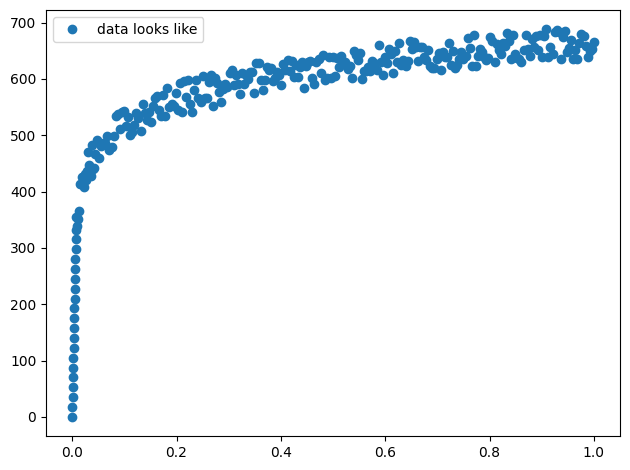

In [3]:
#data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',') #aks
data = np.loadtxt("C:/Users/nguyenminhtuan/Downloads/nmtuan97/scripts/1_ml/ml_learning/data_test.csv", delimiter=',') #home
X = data[:,:1]
y = data[:,1:2]

X = MinMaxScaler().fit_transform(X)

X_for_train, X_test, y_for_train, y_test = train_test_split(X,y,test_size = 0.2)

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
#train model using decision tree
r2_ = 0.99
r2_train_ = 0.0
r2_cv_ = 0.0
max_ = 0
while r2_cv_ < float(r2_):
    X_train,X_cv,y_train,y_cv = train_test_split(X_for_train,y_for_train,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=5)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_ = dt_reg.predict(X_train)
    y_test_predicted_ = dt_reg.predict(X_cv)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_))
    r2_train_ = r2_score(y_train, y_train_predicted_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_)
    # Evaluating test dataset
    rmse_cv_ = np.sqrt(mean_squared_error(y_cv, y_test_predicted_))
    r2_cv_ = r2_score(y_cv, y_test_predicted_)
    mae_cv_ = mean_absolute_error(y_cv, y_test_predicted_)
    
    if r2_cv_ > max_:
        max_ = r2_cv_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_cv_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_cv_))

R2 score of test is 0.9809379059933742
R2 score of test is 0.9818418979682684
R2 score of test is 0.9820141718298498
R2 score of test is 0.9823280030906623
R2 score of test is 0.9880406538034457
R2 score of test is 0.9881062507588452
R2 score of test is 0.9895539257883302
R2 score of test is 0.9907984980615834
-------------------------------------------
RMSE of training is 15.18996173957629
R2 score of training  is 0.9842851846791943
MAE of training is 12.285237656691644
RMSE of test is 16.575773192717893
R2 score of test is 0.9907984980615834
MAE of test is 13.632941787673932


0.9801377729777297


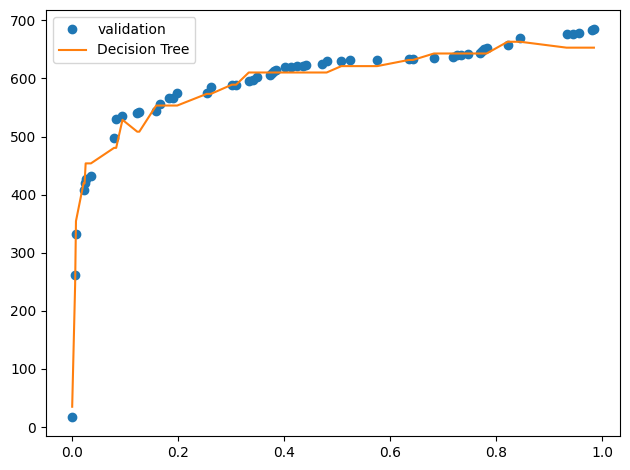

In [19]:
# dt_model_ = f"dt_model.pickle"
# print(f"Save model to file {dt_model_} ... ", end="")
# pickle.dump(dt_reg, open(dt_model_, "wb"))
# print("OK")

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)

y_pred_3 = dt_reg.predict(X_test)
r2_test_ = r2_score(y_test, y_pred_3)
print(r2_test_)

plt.plot(X_test, y_test, 'o', label='validation')
plt.plot(X_test, y_pred_3, '-', label='Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()